# Fishers linear discriminant

See: https://scikit-learn.org/stable/modules/lda_qda.html

and https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### (1) Define 2D sample generation procedure

In [2]:
# Generate 2D normal distributed sample using method from lecture 4

def mydata(Nmc,pos,sig,corr=0.0):

    data = np.empty(shape=(Nmc,2))
    
    phi = 0.5*np.arcsin(corr)

    g = np.random.normal(size=(2,Nmc))

    data[:,0] = pos[0] + sig[0]*(g[0]*np.cos(phi) + g[1]*np.sin(phi))
    data[:,1] = pos[1] + sig[1]*(g[0]*np.sin(phi) + g[1]*np.cos(phi))
    
    return data

### (2) Generating data

In [3]:
# Test data consist of two 2D event samples
# one generated from H1 hypothesis and one from H2

# Events per sample

Nmc = 50

# Measurement uncertainties and correlation (same for both hypothesis)

sig = np.array([0.4,0.2])
corr = 0.0

# Nominal values for each case (2D)

h1 = np.array([-1.,-1.])
h2 = np.array([1.,1.])


X = np.empty(shape=(2*Nmc,2))
y = np.empty(shape=(2*Nmc))


X[:Nmc,:] = mydata(Nmc,h1,sig,corr)
y[:Nmc] = 1

X[Nmc:,:] = mydata(Nmc,h2,sig,corr)
y[Nmc:] = 2

print("Test data defined, size: ",y.size)

Test data defined, size:  100


### (3) Calculate expected covariance matrix

In [4]:
# Expected covariance matrix of the measurements
# (same for both hypothesis)

acorr = np.array([[1.,corr],[corr,1.]])

cov = np.outer(sig,sig) * acorr

### (4) Calculate expected discriminant direction

In [5]:
cinv = np.linalg.inv(cov+cov)

w = cinv @ ( h2 - h1 )

norm = np.sum(w*w)

w /= np.sqrt(norm)

print("Discriminant coefficients: w0 = %.4f   w1 = %.4f"%(w[0],w[1]))

Discriminant coefficients: w0 = 0.2425   w1 = 0.9701


In [6]:
# Division line should cross in the middle between h1 and h2

h0 = 0.5*(h1+h2)

w0 = w @ h0

# Coefficients for the line    w @ h = w0

aw = -w[0]/w[1]
bw = w0/w[1]

print("Discriminant line: y = %.4f * x  +  %.4f"%(aw,bw))

Discriminant line: y = -0.2500 * x  +  0.0000


### (5) Linear discriminant for the generated sample from sklearn

In [7]:
# Create discriminant

clf = LinearDiscriminantAnalysis(solver="svd")    # ‘svd’, ‘lsqr’, 'eigen'
clf.fit(X, y)

# Check result (coefficients)

cf = clf.coef_[0]

# Normalise to unit vector (for comparison)

ncf = np.sqrt(np.sum(cf*cf))

print("Discriminant coefficients: w0 = %.4f   w1 = %.4f"%(cf[0]/ncf,cf[1]/ncf))

# Check reference value at (0,0)

off = clf.predict_proba([[0.,0.]])

# Line to draw for p=0.5  ( y = a x + b )

a = -cf[0]/cf[1]
b = (0.5-off[0,0])/cf[1]

print("Discriminant line: y = %.4f * x  +  %.4f"%(a,b))

Discriminant coefficients: w0 = 0.2694   w1 = 0.9630
Discriminant line: y = -0.2797 * x  +  0.0039


### (6) Plot results

In [8]:
# Create result graph

Xmin = -5.0
Xmax = 5.0
Np = 2

Xfun = np.linspace(Xmin,Xmax,Np)

# Discriminant line from the generated sample and from the distribution parameters

Yfun = a*Xfun + b
Ywfun = aw*Xfun + bw

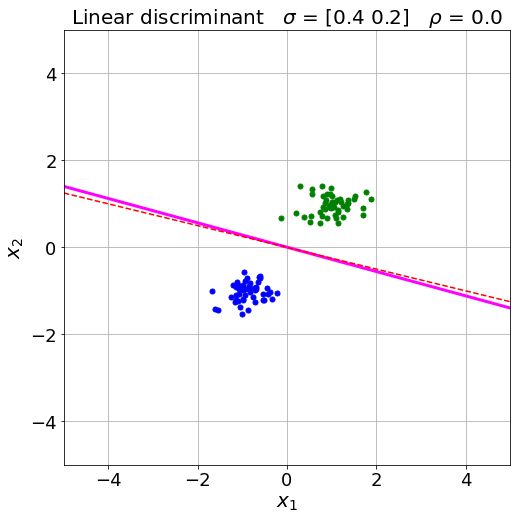

In [10]:
plt.figure(figsize=(8, 8))

# Training points in two categories

plt.plot(X[:Nmc,0],X[:Nmc,1],'o',color='blue',ms=5)
plt.plot(X[Nmc:,0],X[Nmc:,1],'o',color='green',ms=5)

plt.title("Linear discriminant   $\sigma$ = "+str(sig)+"   $\\rho$ = "+str(corr),size=20)
plt.xlabel('$x_1$',size=20)
plt.ylabel('$x_2$',size=20)

plt.plot(Xfun,Yfun,'-',color='magenta',linewidth=3)
plt.plot(Xfun,Ywfun,'--',color='red')

plt.xlim([Xmin,Xmax])
plt.ylim([Xmin,Xmax])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

if Nmc == 50 :
    fname = '12_Fisher_'+str(sig[0])+'_'+str(sig[1])+'_'+str(corr)+'.png'
else :
    fname = '12_Fisher_'+str(sig[0])+'_'+str(sig[1])+'_'+str(corr)+'_'+str(2*Nmc)+'.png'
    

plt.savefig(fname)

plt.show()